In [6]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt


classes = {'vegetation': 0, 'building': 1, 'water': 2}
n_classes = len(classes)
palette = np.uint8([[0, 255, 0], [255, 0, 0], [0, 0, 255]])

img = io.imread('https://i.stack.imgur.com/TFOv7.png')
rows, cols, bands = img.shape

print rows, cols, bands

300 300 3


### Input Data

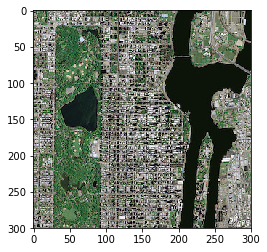

In [9]:
io.imshow(img)
plt.show()

### Read image as array

In [31]:
X = img.reshape(rows*cols, bands)
print X.shape
X

(90000, 3)


array([[149, 147, 134],
       [ 83,  63,  56],
       [ 76,  79,  72],
       ..., 
       [159, 154, 151],
       [170, 153, 163],
       [151, 154, 159]], dtype=uint8)

### Apply labeling

In [29]:
# we put some labeling selecting by hand the bounding boxes
supervised = n_classes*np.ones(shape=(rows, cols), dtype=np.int)
supervised[200:220, 150:170] = classes['building']
supervised[40:60, 40:60] = classes['vegetation']
supervised[100:120, 200:220] = classes['water']

y = supervised.ravel()

print supervised.shape
print y.shape

(300, 300)
(90000,)


### Perform Clustering

In [14]:
train = np.flatnonzero(supervised < n_classes)
test = np.flatnonzero(supervised == n_classes)

from sklearn.svm import SVC
clf = SVC()
clf.fit(X[train], y[train])
y[test] = clf.predict(X[test])
supervised = y.reshape(rows, cols)

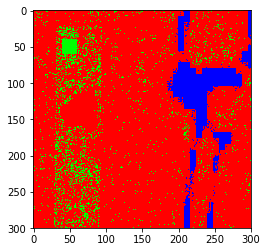

In [15]:
io.imshow(palette[supervised])
plt.show()